In [2]:
!pip install ultralytics ocr-nanonets-wrapper

Defaulting to user installation because normal site-packages is not writeable
  Using cached ocr-nanonets-wrapper-1.1.tar.gz (4.2 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [12 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 14, in <module>
        File "/home/pratik/.local/lib/python3.10/site-packages/setuptools/__init__.py", line 20, in <module>
          from setuptools.dist import Distribution, Feature
        File "/home/pratik/.local/lib/python3.10/site-packages/setuptools/dist.py", line 34, in <module>
          from setuptools.depends import Require
        File "/home/pratik/.local/lib/python3.10/site-packages/setuptools/depends.py", line 7, in <module>
          from .py33compat import Bytecode
        File "/home/pratik/.local/lib/python3.10/site-packages/s

In [3]:
from ultralytics import  YOLO

In [5]:
# model = YOLO('/runs/detect/train25/weights/best.pt') 
model = YOLO('runs/detect/train21/weights/best.pt') 



In [6]:
# img_name =['WhatsApp Image 2023-07-08 at 21.09.34.jpeg']
img_name=['https://legalnitiai.s3.ap-south-1.amazonaws.com/image/WhatsApp+Image+2023-08-12+at+15.50.17.jpg']
t = model.predict(img_name, save=True, imgsz=640, conf=0.1, save_txt = True, save_conf= True,show_labels= False)

error: OpenCV(4.8.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:696: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'


In [16]:
img_path = []
label_path = []
for j,i in enumerate(t):
    label = i.names
    img_path.append(i.save_dir+'/'+img_name[j])
    label_path.append(i.save_dir+'/labels/'+'.'.join(img_name[j].split('.')[:-1])+'.txt')

In [17]:
img_path

['runs/detect/predict17/WhatsApp Image 2023-07-08 at 21.09.34.jpeg']

In [18]:
import matplotlib.pyplot as plt
from PIL import Image 

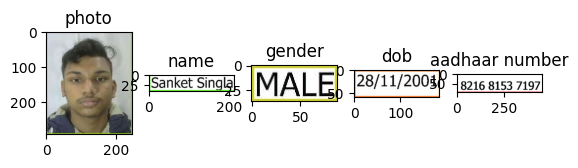

In [27]:
detect_list = []
for x in range(len(img_path)):
    with  open(label_path[x],'r') as file:
        labels = file.readlines()
    img = Image.open(img_path[x])
    img.show()
    height  = img.height
    width = img.width
    detect_dict = {}
    for i in labels:
        value = [float(a) for a in i.split()]
        sw = int(width * float(value[1] - value[3]/2))
        ew = int(width * float(value[1] + value[3]/2))
        sh = int(height * float(value[2] - value[4]/2))
        eh = int(height * float(value[2] + value[4]/2))
        detect_dict[label[int(value[0])]]=[img.crop((sw, sh, ew, eh)),value[5]]
    l = len(detect_dict)
    i = 0
    for x,j in detect_dict.items():
        plt.subplot(1,l,i+1)
        plt.imshow(j[0])
        plt.title(x)
        i +=1
    detect_list.append(detect_dict)
    plt.show()

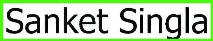

In [32]:
detect_list[0]['name'][0]

In [1]:
!python3 -m pip install --upgrade pip setuptools==41.0.1 wheel 

/bin/bash: /home/pc/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Defaulting to user installation because normal site-packages is not writeable
  Using cached setuptools-41.0.1-py2.py3-none-any.whl (575 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.0.0
    Uninstalling setuptools-68.0.0:
      Successfully uninstalled setuptools-68.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ultralytics 8.0.131 requires requests>=2.23.0, but you have requests 2.22.0 which is incompatible.
ultralytics 8.0.131 requires tqdm>=4.64.0, but you have tqdm 4.36.1 which is incompatible.


In [20]:
from nanonets import NANONETSOCR 
import tempfile
# import nanonets

In [21]:
dir_loc = tempfile.mkdtemp()
model1=NANONETSOCR()
model1.set_token('3edab03f-18ab-11ee-b7d0-86364e72d134')

In [22]:
detect_list

[{'photo': [<PIL.Image.Image image mode=RGB size=245x293>, 0.198596],
  'name': [<PIL.Image.Image image mode=RGB size=213x41>, 0.8505],
  'gender': [<PIL.Image.Image image mode=RGB size=88x37>, 0.835093],
  'dob': [<PIL.Image.Image image mode=RGB size=185x58>, 0.813113],
  'aadhaar number': [<PIL.Image.Image image mode=RGB size=448x96>, 0.794269]}]

In [23]:
for x,i in enumerate(detect_list):
    tp = {}
    for j in i.keys():
        tp[j]=f'{dir_loc}\\{j}_{x}.jpg'
        i[j][0].save(tp[j])
        print(tp[j])
    print(tp)
    detect_list[x] = tp
        


/tmp/tmpjin8xsvt\photo_0.jpg
/tmp/tmpjin8xsvt\name_0.jpg
/tmp/tmpjin8xsvt\gender_0.jpg
/tmp/tmpjin8xsvt\dob_0.jpg
/tmp/tmpjin8xsvt\aadhaar number_0.jpg
{'photo': '/tmp/tmpjin8xsvt\\photo_0.jpg', 'name': '/tmp/tmpjin8xsvt\\name_0.jpg', 'gender': '/tmp/tmpjin8xsvt\\gender_0.jpg', 'dob': '/tmp/tmpjin8xsvt\\dob_0.jpg', 'aadhaar number': '/tmp/tmpjin8xsvt\\aadhaar number_0.jpg'}


In [24]:
for x,i in enumerate(detect_list):
	tp = {}
	for j in i.keys():
		print(i[j])
		if j == 'photo':
			continue
		tp[j]=model1.convert_to_string(i[j])
		print(tp[j])
	# print(tp)
	detect_list[x] = tp

/tmp/tmpjin8xsvt\photo_0.jpg
/tmp/tmpjin8xsvt\name_0.jpg
Sanket
/tmp/tmpjin8xsvt\gender_0.jpg
MAL
/tmp/tmpjin8xsvt\dob_0.jpg
28/11/2001
/tmp/tmpjin8xsvt\aadhaar number_0.jpg
8216 8153 7197


In [33]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="osjtrIbOFzOIzU0ovhEG")
project = rf.workspace("ocr-ijs1m").project("aadhar-gp4c2")
dataset = project.version(4).download("yolov8")


/bin/bash: /home/pc/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Using cached roboflow-1.1.0-py3-none-any.whl (57 kB)
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Using cached wget-3.2-py3-none-any.whl
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached supervision-0.11.1-py3-none-any.whl (55 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting unin

Extracting Dataset Version Zip to aadhar-4 in yolov8:: 100%|██████████| 17994/17994 [00:00<00:00, 30950.11it/s]
